# Created color maps for image analysis outputs, for slides 991 and 992
**Goal:**  Establish color palette for TNBC samples for openDVP manuscript 
**Input:** 991_992 adata, phenotype categories, RCN categories    
**Output:** color maps for phenotypes and for RCN    
**Author:** Jose Nimo    
**Date_of_creation:** 09.04.2025     
**Date_of_latest_modification:** 09.04.2025    
**Status:** Complete    

# Setup and imports

In [37]:
import spatialdata
# import spatialdata_plot
# import dask_image.imread
# import dask.array as da
# import napari_spatialdata
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.colors as mcolors
import matplotlib.image as mpimg
import seaborn as sns

# import geopandas as gpd
# import anndata as ad
# import numpy as np
# import anndata as ad
from loguru import logger
import json

import sys, os
sys.path.append(os.path.abspath("../src/opendvp/"))

for package in [spatialdata]:
    print(f"{package.__name__}: {package.__version__}")

spatialdata: 0.3.0


In [5]:
!pixi list

Package                           Version         Build                 Size        Kind   Source
anndata                           0.10.9                                424 KiB     pypi   anndata-0.10.9-py3-none-any.whl
anyio                             4.8.0           pyhd8ed1ab_0          112.6 KiB   conda  anyio
aom                               3.9.1           h7bae524_0            2.1 MiB     conda  aom
appnope                           0.1.4           pyhd8ed1ab_1          9.8 KiB     conda  appnope
argon2-cffi                       23.1.0          pyhd8ed1ab_1          18.2 KiB    conda  argon2-cffi
argon2-cffi-bindings              21.2.0          py311h460d6c5_5       32.2 KiB    conda  argon2-cffi-bindings
array_api_compat                  1.11                                  172.4 KiB   pypi   array_api_compat-1.11-py3-none-any.whl
arrow                             1.3.0           pyhd8ed1ab_1          97.6 KiB    conda  arrow
asciitree                         0.3.3       

# 09.04.2025 -- Establish groups

## Determine biological groups

### Load sdata

In [6]:
path_to_sdata = "/Users/jnimoca/Jose_BI/4_Projects/P26_BCCN/P26E19_SpatialDataIntegration/data/sdata/sdata_991.zarr"
sdata = spatialdata.read_zarr(path_to_sdata)
sdata

/opt/homebrew/Caskroom/mambaforge/base/envs/spatialdata/lib/python3.12/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


SpatialData object, with associated Zarr store: /Users/jnimoca/Jose_BI/4_Projects/P26_BCCN/P26E19_SpatialDataIntegration/data/sdata/sdata_991.zarr
├── Images
│     └── 'mIF': DataTree[cyx] (15, 44470, 73167), (15, 14823, 24389), (15, 4941, 8129), (15, 1647, 2709)
├── Labels
│     └── 'mask': DataTree[yx] (44470, 73167), (14823, 24389), (4941, 8129), (1647, 2709)
├── Shapes
│     ├── 'mask_polygons': GeoDataFrame shape: (685805, 2) (2D shapes)
│     ├── 'primary_lmd_contours': GeoDataFrame shape: (234, 8) (2D shapes)
│     └── 'relapse_lmd_contours': GeoDataFrame shape: (214, 8) (2D shapes)
└── Tables
      ├── 'imaging_991': AnnData (610182, 8)
      └── 'proteins': AnnData (219, 4766)
with coordinate systems:
    ▸ 'global', with elements:
        mIF (Images), mask (Labels), mask_polygons (Shapes), primary_lmd_contours (Shapes), relapse_lmd_contours (Shapes)

In [7]:
sdata['imaging_991'].obs.phenotype.value_counts()

phenotype
Unknown           218068
Cancer_cells      216397
CD4_Tcells        109335
COL1A1_cells       45124
CD8_Tcells          8826
Vimentin_cells      7933
B_cells             3578
Macrophages          921
Name: count, dtype: int64

In [10]:
# 8 cell types
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [11]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

**Decision**:    
we will use tab10 for phenotype in images, good contrast, will use colorblind variation for plots

### plot colors with hexcodes

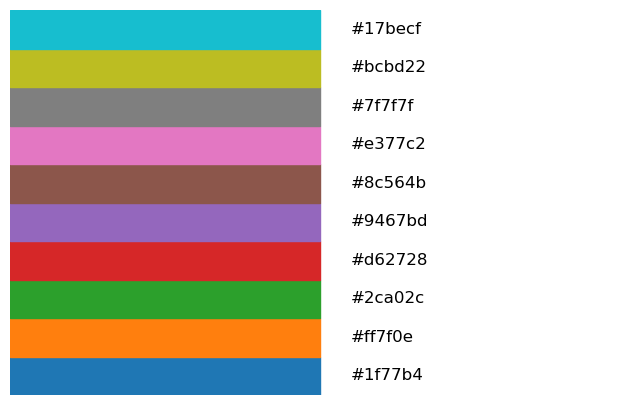

In [17]:
colors = sns.color_palette("tab10")
hex_colors = [mcolors.to_hex(c) for c in colors]

fig, ax = plt.subplots(figsize=(8, len(colors) * 0.5))

for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((0, i), 1, 1, color=color))
    ax.text(1.1, i + 0.5, color, ha='left', va='center', fontsize=12)

ax.set_xlim(0, 2)
ax.set_ylim(0, len(colors))
ax.axis('off')

plt.show()

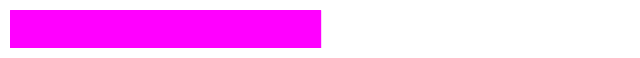

In [23]:
def plot_hex_code(hex_string):
    fig, ax = plt.subplots(figsize=(8, 0.5))
    ax.add_patch(plt.Rectangle((0, 0), 1, 1, color=hex_string))
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.show()

plot_hex_code("#FF00FF")

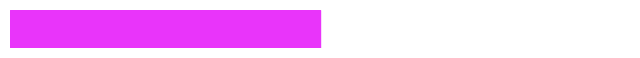

In [24]:
plot_hex_code("#E934FA")

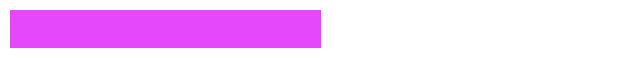

In [25]:
plot_hex_code("#E548FA")

**Decision:**    
I have decided by trying out many palletes in QuPath. It is quite complicated above 8 colors.

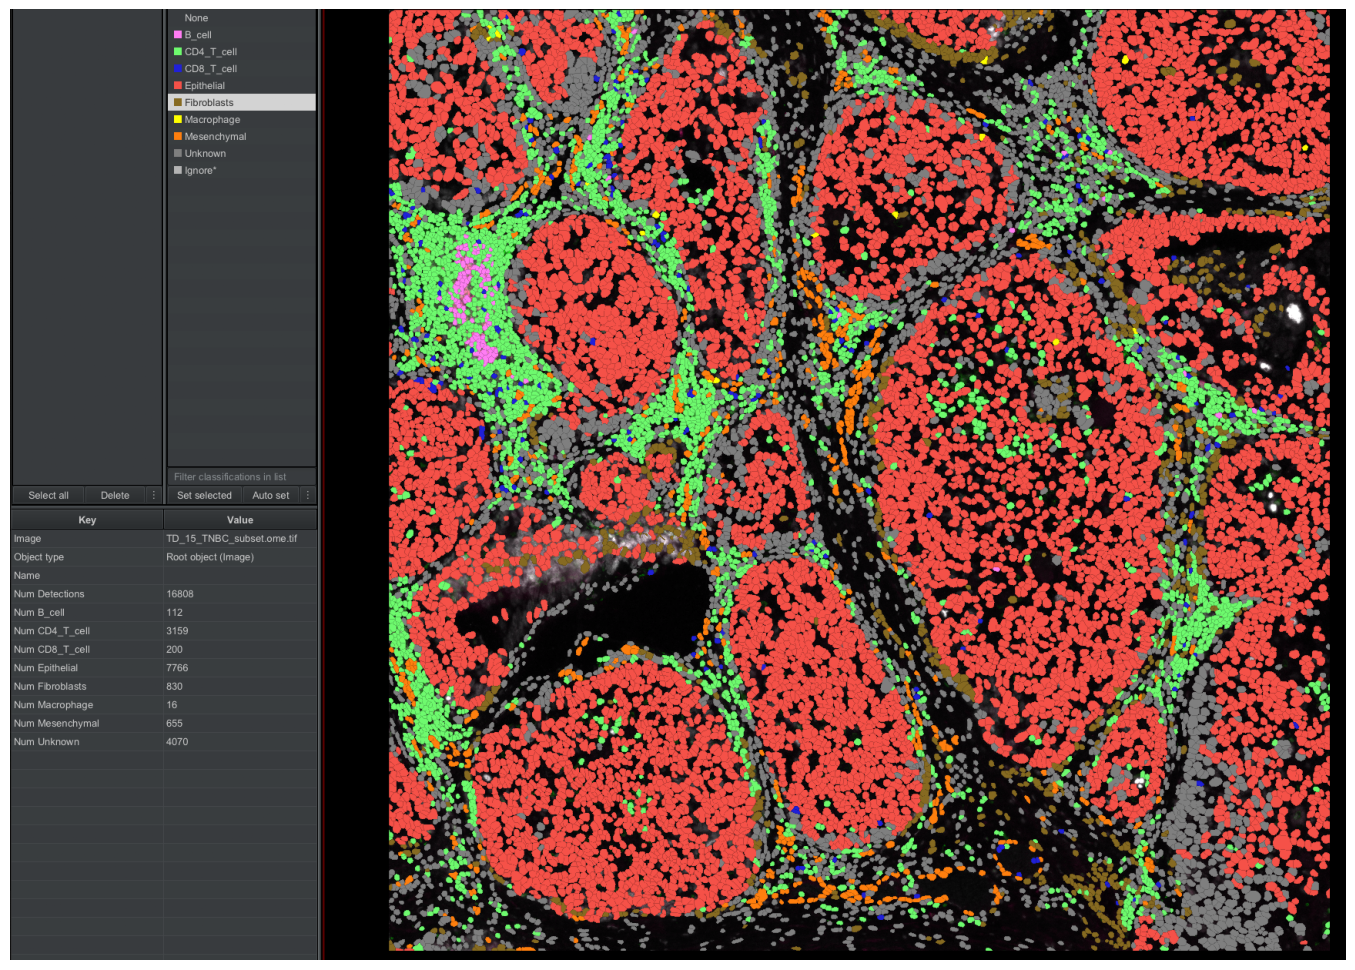

In [ ]:
img = mpimg.imread('../assets/pheno_colors.png')
height, width = img.shape[:2]
dpi = 100 
plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
plt.imshow(img)
plt.axis("off")
plt.show()

In [35]:
phenotype_colors = { 
    "B_cells":       "#ff7df3", #pink
    "CD4_Tcells":   "#6efa6e",  #green
    "CD8_Tcells":   "#2020d8",  #blue
    "Cancer_cells": "#f55148",  #red
    "Vimentin_cells":"#866a21", #brown
    "Macrophages":  "#ffff00", #yellow
    "COL1A1_cells": "#ff7f0e",  #orange 
    "Unknown":      "#7f7f7f",  #grey 
}

### Save dictionary as JSON

In [38]:
with open("../assets/pheno_colors.json", "w") as f:
    json.dump(phenotype_colors, f, indent=4)  # indent=4 makes it pretty-printed

In [39]:
# check import works
with open("../assets/pheno_colors.json", "r") as f:
    loaded_dict = json.load(f)
loaded_dict

{'B_cells': '#ff7df3',
 'CD4_Tcells': '#6efa6e',
 'CD8_Tcells': '#2020d8',
 'Cancer_cells': '#f55148',
 'Vimentin_cells': '#866a21',
 'Macrophages': '#ffff00',
 'COL1A1_cells': '#ff7f0e',
 'Unknown': '#7f7f7f'}

## Create color maps for RCNs similar enough to phenotype colors

### check RCNs

In [41]:
sdata['imaging_991'].obs.columns

Index(['CellID', 'Y_centroid', 'X_centroid', 'Area', 'MajorAxisLength',
       'MinorAxisLength', 'Eccentricity', 'Orientation', 'Extent', 'Solidity',
       'artefact', 'Area_filter_nottoobig', 'Area_filter_nottoolow',
       'Area_filter', 'DAPI_ratio', 'DAPI_ratio_pass_nottoolow',
       'DAPI_ratio_pass_nottoohigh', 'DAPI_ratio_pass', 'filtering', 'imageid',
       'phenotype', 'cell_id', 'spatial_lda_knn7_kmeans_k7',
       'spatial_lda_knn14_kmeans_k7', 'spatial_lda_knn21_kmeans_k7',
       'spatial_lda_knn30_kmeans_k7', 'spatial_lda_knn40_kmeans_k7',
       'spatial_lda_knn50_kmeans_k7', 'shapes'],
      dtype='object')

In [42]:
def plot_rcn_stacked_barplot(df, phenotype_col, rcn_col, normalize=True):
    """
    Plots a stacked barplot showing phenotype composition per RCN motif.
    
    Parameters:
    df (DataFrame): Input dataframe containing phenotype and RCN columns
    phenotype_col (str): Column name for phenotypes
    rcn_col (str): Column name for RCN motifs
    normalize (bool): If True, normalize frequencies to proportions per motif
    """
    # Count frequencies of each phenotype within each RCN
    count_df = df.groupby([rcn_col, phenotype_col]).size().unstack(fill_value=0)
    
    # Normalize to proportions if requested
    if normalize:
        count_df = count_df.div(count_df.sum(axis=1), axis=0)
    
    # Create the stacked barplot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    bottoms = [0] * len(count_df)
    for phenotype, color in phenotype_colors.items():
        if phenotype in count_df.columns:
            ax.bar(count_df.index, count_df[phenotype],
                   bottom=bottoms, color=color, label=phenotype)
            bottoms = [i + j for i, j in zip(bottoms, count_df[phenotype])]
    
    # Customize plot
    ax.legend(title="Phenotype", bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylabel("Proportion" if normalize else "Count")
    ax.set_xlabel("RCN Motif")
    ax.set_title("Phenotype Composition per RCN Motif")
    plt.tight_layout()
    plt.show()

/var/folders/x7/grkjlk8s223dy6234rnz1885mxz2_6/T/ipykernel_7978/285896834.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df = df.groupby([rcn_col, phenotype_col]).size().unstack(fill_value=0)


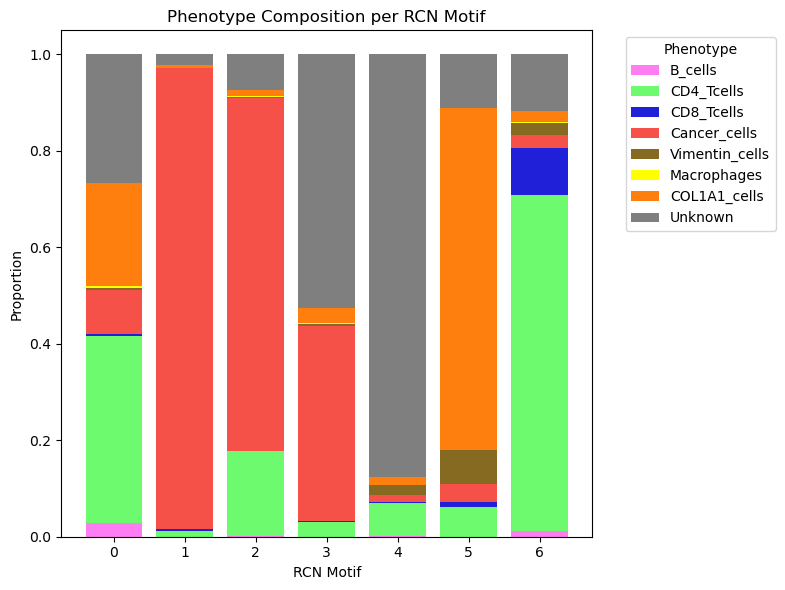

In [43]:
plot_rcn_stacked_barplot(
    df= sdata['imaging_991'].obs,
    phenotype_col="phenotype",
    rcn_col="spatial_lda_knn21_kmeans_k7"
)

In [44]:
sdata['imaging_991'].obs.spatial_lda_knn21_kmeans_k7.dtype

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6'], ordered=False, categories_dtype=object)

### Manually select colors by dominant cell type

In [51]:
def print_color_dict(dictionary):

    fig, ax = plt.subplots(figsize=(8, len(phenotype_colors) * 0.5))

    for index,(name, hex) in enumerate(dictionary.items()):
        ax.add_patch(plt.Rectangle((0, index), 1, 1, color=hex))
        ax.text(1.1, index + 0.5, name, ha='left', va='center', fontsize=12)

    # Adjust plot limits and aesthetics
    ax.set_xlim(0, 2)
    ax.set_ylim(0, len(colors))
    ax.axis('off')

    plt.show()

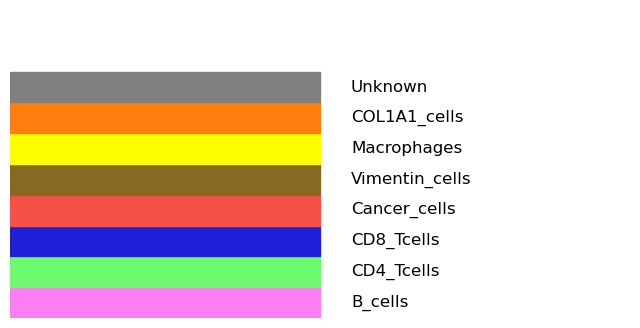

In [52]:
print_color_dict(phenotype_colors)

In [50]:
RCN_colors = {
    "0" : "#FFA3FE", #pink b cell dominant
    "1" : "#F5887F", #redish cancer dominant
    "2" : "#5B5BDB", #CD4 cancer interaction, bluish
    "3" : "#8A7542", #unknown and cancer, ocreish
    "4" : "#959191", #unknown dominant, grey
    "5" : "#FF973E", #COL1A1 dominant, orangish 
    "6" : "#AAFAB1", #CD4 dominant, greenish
}

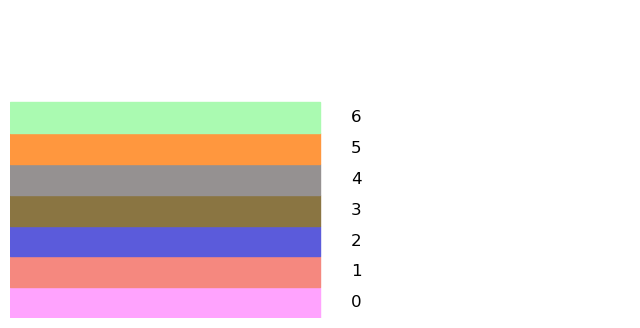

In [53]:
print_color_dict(RCN_colors)

**Message to myself:**    
This exploration was of just slide 991, maybe using both would paint a better picture

In [54]:
with open("../assets/RCN_colors.json", "w") as f:
    json.dump(RCN_colors, f, indent=4)